### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Loading The Data

In [2]:
data_frame = pd.read_csv("data.csv")
X = data_frame.iloc[:,1:14]
y = data_frame.iloc[:,-1]
# print(X.head())
# print(y.head())

### Splitting Data

In [50]:
from sklearn.model_selection import train_test_split

# Test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,shuffle=True) 

### K-Nearest Negihbors

#### Choosing the best K

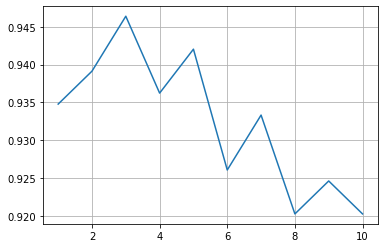

best_K = 3 


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

cv_scores = []
# finding the best K that gives the best score on the validation set
for k in range(1,11):
    #create a new KNN model
    knn_cv = KNeighborsClassifier(n_neighbors=k)

    #train model with cv of 5 
    cv_score = cross_val_score(knn_cv, X_train, y_train, cv=10)
    cv_scores.append(np.mean(cv_score))

plt.plot(range(1,11),cv_scores)
plt.grid()
plt.show()

# from the plot we see that best k is 3
best_K = cv_scores.index(max(cv_scores)) + 1
print(f"{best_K = } ")

#### Training


In [52]:
kn_classifier = KNeighborsClassifier(n_neighbors=best_K)
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Testing

f1-score = 0.76


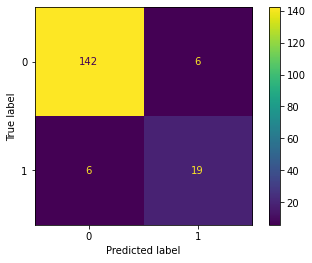

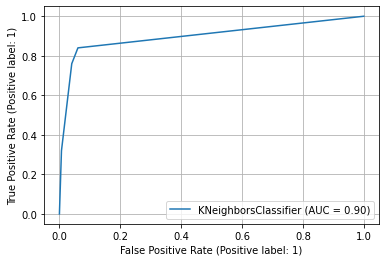

In [53]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score

# making predictions
y_pred = kn_classifier.predict(X_test)

# Confusion Matrix 
plot_confusion_matrix(kn_classifier, X_test, y_test)

# f1-score
print(f"f1-score = {f1_score(y_test, y_pred)}")

# ROC curve 
plot_roc_curve(kn_classifier, X_test, y_test)
plt.grid()  

### Logistic Regression


### Naïve Bayes